In [51]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
from synth_dim_model import *

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [55]:
N = 2
M = 5
V = -1
dt = 0.01

mu_V_ratio_steps = [
    np.array([10, 10]),  # step 1
    np.array([10, 0]),   # step 2
    np.array([0, 0]),    # step 3
    np.array([0, 0])     # step 4
]
J_V_ratio_steps = [
    np.array([0.1, 10]), # step 1
    np.array([10, 10]),  # step 2
    np.array([10, 2]),   # step 3
    np.array([2, 0.5]),  # step 4
]
step_times = [1,2,0.5,1]  # total times for each step
total_time = np.sum(step_times)
print(f"Total Time: {total_time}")

Total Time: 4.5


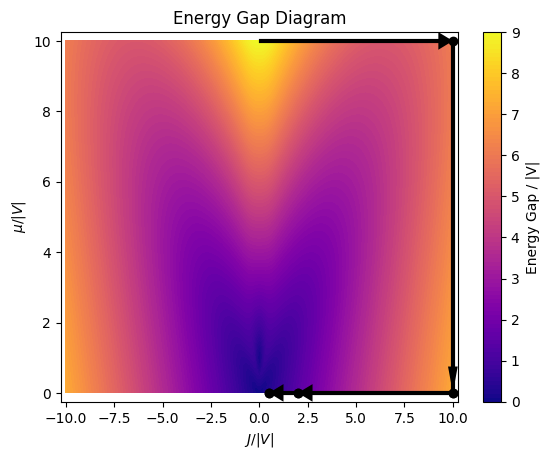

In [53]:
resolution = 1000
energy_gap_df = pd.read_csv(f"energy_gap_over_V_resolution={resolution}.csv", index_col=0)
energy_gap_df = energy_gap_df.to_numpy()  # Keep the data as is

image_mu_V_ratios = np.linspace(0, 10, resolution)
image_J_V_ratios = np.linspace(-10, 10, resolution)  # Correct range from -10 to 10

mu_V_ratio_grid, J_V_ratio_grid = np.meshgrid(image_mu_V_ratios, image_J_V_ratios)

plt.figure()
plt.contourf(J_V_ratio_grid, mu_V_ratio_grid, energy_gap_df, levels=100, cmap='plasma')
plt.colorbar(label='Energy Gap / |V|')
plt.xlabel('$J / |V|$')
plt.ylabel('$\\mu / |V|$')
plt.title('Energy Gap Diagram')

# overlaying paths with arrows
for i in range(len(mu_V_ratio_steps) - 1):
    plt.plot(J_V_ratio_steps[i], mu_V_ratio_steps[i], 'k-', linewidth=3)
    plt.plot(J_V_ratio_steps[i+1], mu_V_ratio_steps[i+1], 'ko')
    
    # add arrow
    plt.arrow(J_V_ratio_steps[i][0], mu_V_ratio_steps[i][0],
              J_V_ratio_steps[i][1] - J_V_ratio_steps[i][0],
              mu_V_ratio_steps[i][1] - mu_V_ratio_steps[i][0],
              shape='full', lw=0, length_includes_head=True, head_width=0.5, color='black')

plt.plot(J_V_ratio_steps[-1], mu_V_ratio_steps[-1], 'k-', linewidth=3)
plt.plot(J_V_ratio_steps[-1][-1], mu_V_ratio_steps[-1][-1], 'ko')

plt.arrow(J_V_ratio_steps[-1][0], mu_V_ratio_steps[-1][0],
          J_V_ratio_steps[-1][1] - J_V_ratio_steps[-1][0],
          mu_V_ratio_steps[-1][1] - mu_V_ratio_steps[-1][0],
          shape='full', lw=0, length_includes_head=True, head_width=0.5, color='black')

plt.xlim(-10.25, 10.25)
plt.ylim(-0.25, 10.25)
plt.show()


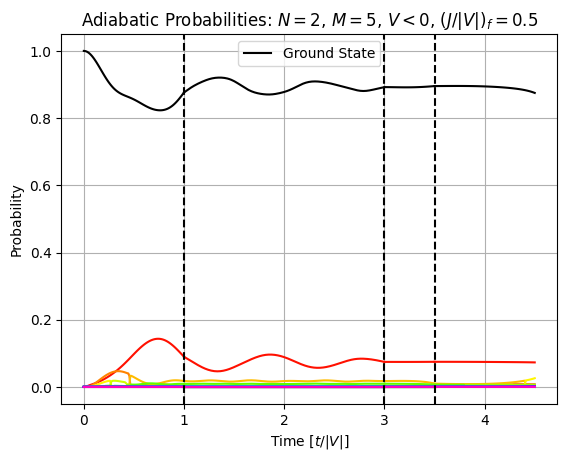

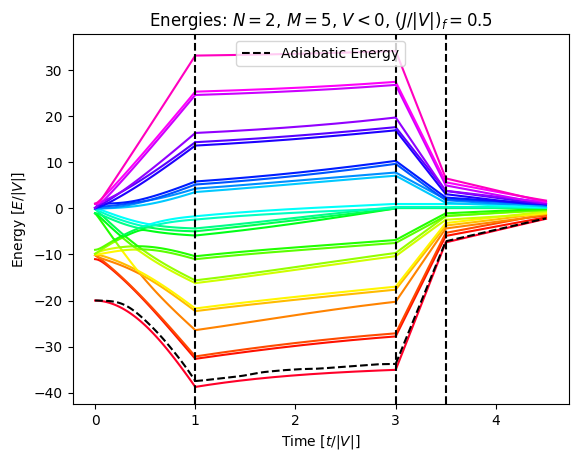

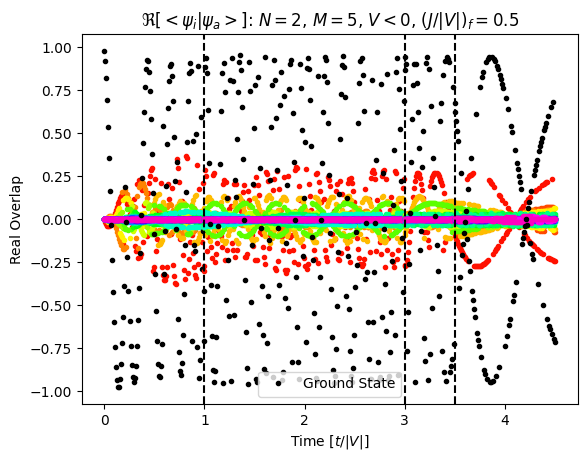

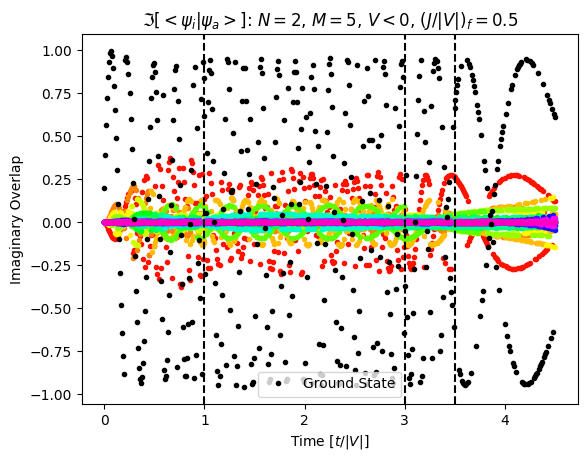

In [54]:
results = multistep_adiabatic_evolution(N, M, V, dt, mu_V_ratio_steps, J_V_ratio_steps, step_times)
plot_multistep_adiabatic_evolution_results(results, N, M, J_V_ratio_steps, step_times)